In [1]:
# A IDEIA CENTRAL DO GRADIENTE DESCENDENTE

"""
    O gradiente é o vetor das derivadas parciais de uma função.
    O gradiente aponta para a direção da entrada na qual a função cresce mais rapidamente.
    """

from linear_algebra import Vector, dot

def sum_of_squares (v: Vector) -> float:
    """Computa a soma de elementos quadrados em v"""
    return dot (v, v)

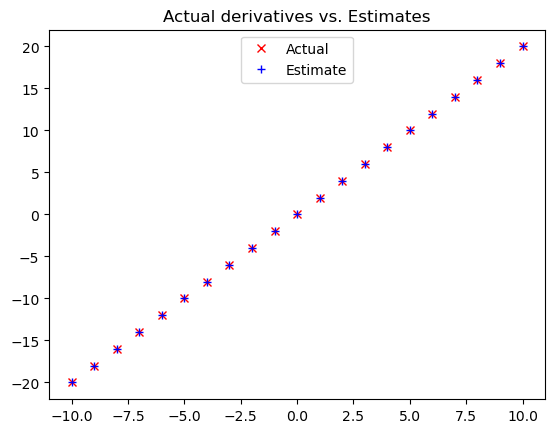

In [2]:
# ESTIMANDO O GRADIENTE

from typing import Callable
from linear_algebra import Vector, dot

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x+h) - f(x)) / h

"""
    É possível estimar derivadas analisando o quociente das diferenças para um pequeno valor 'e'
    """

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2*x

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

import matplotlib.pyplot as plt

plt.title("Actual derivatives vs. Estimates")

plt. plot(
    xs, 
    actuals, 
    'rx', 
    label="Actual"
)
plt.plot(
    xs, 
    estimates,
    'b+',
    label="Estimate"
)

plt.legend(loc=9)

plt.show()

"""
    Se uma função f tem muitas variáveis, ela tem múltiplas derivadas parciais.
    Para calcular a derivada parcial i, devemos considerara outras variáveis como constantes.
    """

def partial_difference_quotient (
    f: Callable[[Vector], float], 
    v: Vector, 
    i: int, 
    h: float
) -> float:
    
    """Retorna o quociente parcial das diferenças i de f em v"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient (
    f: Callable[[Vector], float], 
    v: Vector, 
    h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [2]:
#  USANDO O GRADIENTE

import random
from linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Move 'step-size' na direção de 'gradient' a partir de 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2* v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grade = sum_of_squares_gradient(v)
    v = gradient_step(v, grade, -0.01)
    print(epoch, v)

assert distance(v, [0,0,0]) < 0.001

0 [8.464004479175445, 6.0012066655111065, 6.283068484429991]
1 [8.294724389591936, 5.881182532200884, 6.157407114741392]
2 [8.128829901800097, 5.763558881556866, 6.034258972446564]
3 [7.966253303764096, 5.648287703925729, 5.913573792997632]
4 [7.806928237688814, 5.535321949847215, 5.79530231713768]
5 [7.650789672935037, 5.424615510850271, 5.679396270794927]
6 [7.497773879476337, 5.316123200633266, 5.565808345379028]
7 [7.34781840188681, 5.2098007366206005, 5.4544921784714475]
8 [7.200862033849074, 5.105604721888189, 5.345402334902019]
9 [7.056844793172092, 5.0034926274504254, 5.238494288203978]
10 [6.915707897308651, 4.903422774901417, 5.133724402439898]
11 [6.777393739362478, 4.8053543194033885, 5.0310499143911]
12 [6.641845864575228, 4.70924723301532, 4.930428916103278]
13 [6.509008947283724, 4.615062288355014, 4.831820337781212]
14 [6.37882876833805, 4.522761042587914, 4.735183931025588]
15 [6.251252192971289, 4.432305821736155, 4.6404802524050766]
16 [6.126227149111863, 4.343659705

In [11]:
# USANDO O GRADIENTE DESCENDENTE PARA AJUSTAR OS MODELOS

import random
from linear_algebra import Vector, vector_mean

inputs = [(x, 20*x+5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

theta = [random.uniform(-1,1), random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

0 [33.46537228492261, -0.3309710078695178]
1 [11.013265714948759, -0.3068436935688561]
2 [25.988844924435604, -0.30521674046676966]
3 [16.000135218660986, -0.2886174620614005]
4 [22.66262119169106, -0.2820400919186167]
5 [18.218749625050144, -0.2688133905430884]
6 [21.182825186701013, -0.2600570141369521]
7 [19.205795543456286, -0.2483540749219772]
8 [20.524486018439735, -0.23865157122867697]
9 [19.64492917412947, -0.22764978206777986]
10 [20.231604591073577, -0.21754955332951478]
11 [19.840302188200596, -0.20688284963178222]
12 [20.10131155762057, -0.19662878174431803]
13 [19.927228562285336, -0.18613421262320887]
14 [20.043352414743058, -0.17583471563567715]
15 [19.965908104650744, -0.16543969378966272]
16 [20.017573854504164, -0.15514290629743271]
17 [19.983123096139426, -0.14481504663033368]
18 [20.006112079828373, -0.13454229344093355]
19 [19.990788700461035, -0.12426709677422328]
20 [20.001019669695715, -0.11402777388021376]
21 [19.99420585253908, -0.1037986986627576]
22 [19.9987

2183 [19.9999595168213, 4.932595483147328]
2184 [19.99995959776334, 4.932730251697855]
2185 [19.99995967854355, 4.9328647507922225]
2186 [19.999959759162245, 4.932998980969182]
2187 [19.999959839619752, 4.933132942766406]
2188 [19.999959919916392, 4.933266636720493]
2189 [19.999960000052486, 4.933400063366968]
2190 [19.99996008002836, 4.933533223240287]
2191 [19.999960159844324, 4.933666116873835]
2192 [19.99996023950071, 4.933798744799931]
2193 [19.99996031899783, 4.933931107549832]
2194 [19.999960398335997, 4.934063205653731]
2195 [19.999960477515543, 4.934195039640759]
2196 [19.999960556536774, 4.934326610038993]
2197 [19.99996063540001, 4.934457917375452]
2198 [19.99996071410557, 4.934588962176101]
2199 [19.999960792653763, 4.934719744965855]
2200 [19.999960871044905, 4.934850266268577]
2201 [19.999960949279316, 4.9349805266070845]
2202 [19.999961027357305, 4.935110526503149]
2203 [19.99996110527918, 4.935240266477501]
2204 [19.999961183045265, 4.935369747049825]
2205 [19.999961260

3748 [19.99999823404046, 4.997059676307877]
3749 [19.99999823757132, 4.997065555189302]
3750 [19.99999824109512, 4.997071422316495]
3751 [19.99999824461187, 4.997077277712957]
3752 [19.999998248121596, 4.9970831214021425]
3753 [19.999998251624298, 4.997088953407459]
3754 [19.99999825512, 4.997094773752269]
3755 [19.999998258608713, 4.997100582459884]
3756 [19.999998262090447, 4.997106379553573]
3757 [19.999998265565225, 4.997112165056556]
3758 [19.999998269033053, 4.997117938992009]
3759 [19.999998272493947, 4.997123701383058]
3760 [19.99999827594792, 4.997129452252786]
3761 [19.99999827939499, 4.997135191624228]
3762 [19.999998282835165, 4.997140919520374]
3763 [19.999998286268465, 4.997146635964169]
3764 [19.999998289694897, 4.997152340978509]
3765 [19.999998293114484, 4.997158034586247]
3766 [19.999998296527227, 4.9971637168101894]
3767 [19.99999829993315, 4.997169387673097]
3768 [19.999998303332262, 4.9971750471976835]
3769 [19.999998306724578, 4.9971806954066205]
3770 [19.99999831

In [15]:
# MINIBATCH E GRADIENTE DESCENDENTE ESTOCÁSTICO

"""
    Nesta técnica, usamos o gradiente descendente por minibatch, na qual definimos o gradiente 
    (e damos um passo) com base em uma amostra extraída do conjunto de dados total.
    """

import random
from typing import TypeVar, List, Iterator

T = TypeVar('T')

def minibatches(dataset: List[T],
               batch_size: int,
               shuffle: bool = True) -> Iterator[List[T]]:
    """Gera minibatches de tamanho 'batch-size' a partir do conjunto de dados"""
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: 
        random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start: end]
    
"""
    Resolvendo o gradiente descendente com minibatches
    """

theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x,y,theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

"""
    Utilizando o gradiente descendente estocástico - na qual damos passos de gradiente com base
    em um exemplo de treinamento de cada vez.
    """

theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

# https://scholarworks.gvsu.edu/books/10/

# http://ruder.io/optimizing-gradient-descent/index.html

0 [18.60018287895865, -0.46111164687213324]
1 [19.69473936585882, 0.23378428383770566]
2 [19.774942443593904, 0.45014224647054973]
3 [20.26298324518337, 0.49196264386545707]
4 [19.85592899460837, 0.6094626029124196]
5 [18.025599892644454, 0.7331372939691847]
6 [19.848290176264932, 0.8425329541755879]
7 [20.00640963088986, 0.8718879302745314]
8 [19.587988252619176, 0.9116898964434059]
9 [19.829688926341902, 0.9097222825483419]
10 [19.34701291047613, 1.0072419174085459]
11 [19.79030329539597, 0.8998151626009804]
12 [19.845228288093566, 0.9181784922961238]
13 [19.99688335227259, 1.096360404822056]
14 [19.84948170111985, 1.1420363508570437]
15 [19.999498904231125, 1.1674486481285127]
16 [20.18449876666605, 1.1818128429621115]
17 [19.627078266654767, 1.2248806776431669]
18 [20.548056288057897, 1.2316175405534435]
19 [20.304693863531543, 1.2345898375790636]
20 [20.195367317953952, 1.2640147904518984]
21 [21.494931340994153, 1.3671308629998375]
22 [20.166715762332522, 1.2736750136589623]
23 [